读取数据

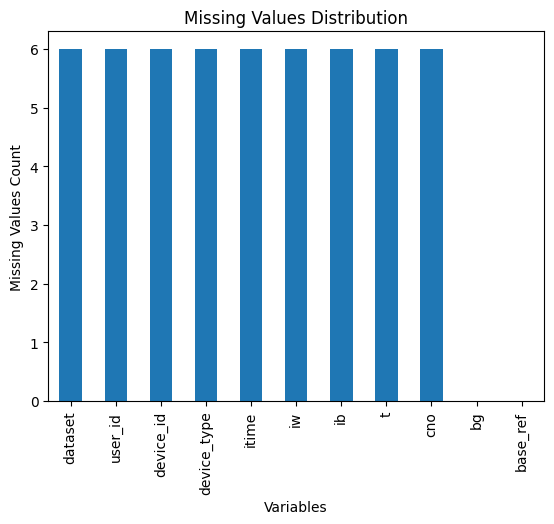

,iw,ib,t,cno,bg,base_ref
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,30.356444,4.851346,32.098695,134.487357,0.619086,128.167618
std,13.079592,1.005462,2.039403,49.203010,8.624783,47.219109
min,9.500000,2.400000,23.000000,34.000000,0.000000,0.000000
25%,19.800000,4.100000,31.000000,101.000000,0.000000,100.000000
50%,28.900000,4.800000,32.000000,127.000000,0.000000,124.000000
75%,38.600000,5.500000,33.500000,161.000000,0.000000,153.000000
max,88.800000,12.600000,37.000000,466.000000,194.000000,448.000000


In [2]:
# 读取文件夹里的所有数据并保存到一个对象里
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

# 读取文件夹里的所有数据
def read_data(path):
    data = {}
    for file in os.listdir(path):
        if file.endswith('.csv'):
            data[file] = pd.read_csv(os.path.join(path, file))
    return data

# 合并表格
def merge_data(data):
    df = pd.DataFrame()
    for key in data:
        df = pd.concat([df, data[key]])
    return df

path = '数据/训练/'

data = read_data(path)
df = merge_data(data)

# 计算缺失值数量
missing_values = df.isnull().sum()

# 创建条形图
missing_values.plot(kind='bar')
plt.title('Missing Values Distribution')
plt.xlabel('Variables')
plt.ylabel('Missing Values Count')
plt.show()

# 去除nan值
df = df.dropna()
df = df[df['cno'] != 0]
df.describe()

In [17]:
import seaborn as sns
sub_df = df[['itime', 'iw', 'ib', 't', 'cno']]
# for column in sub_df:
#     sns.histplot(sub_df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [18]:
# 将itime转换为时间格式并仅使用时间部分

df['itime'] = pd.to_datetime(df['itime'])
# df['itime'] = df['itime'].dt.time


df

,dataset,user_id,device_id,device_type,itime,iw,ib,t,cno,bg,base_ref
12,2019_CT2,Ks20_06,Ks20_06_01,CT2,2019-12-02 10:00:00,48.3,5.8,31.0,160.0,0,0
32,2019_CT2,Ks20_06,Ks20_06_01,CT2,2019-12-02 11:00:00,44.2,5.0,31.0,130.0,0,0
52,2019_CT2,Ks20_06,Ks20_06_01,CT2,2019-12-02 12:00:00,36.6,4.5,31.5,115.0,0,0
59,2019_CT2,Ks20_06,Ks20_06_01,CT2,2019-12-02 12:21:00,35.1,4.4,31.0,100.0,0,0
63,2019_CT2,Ks20_06,Ks20_06_01,CT2,2019-12-02 12:33:00,33.6,4.3,31.0,102.0,0,108
...,...,...,...,...,...,...,...,...,...,...,...
6494,2019_CT2,Ks20_19,Ks20_19_01,CT2,2020-02-02 22:00:00,9.8,2.9,31.0,118.0,0,92
6593,2019_CT2,Ks20_19,Ks20_19_01,CT2,2020-02-03 02:57:00,9.9,3.5,33.5,94.0,0,89
6673,2019_CT2,Ks20_19,Ks20_19_01,CT2,2020-02-03 06:57:00,9.5,3.0,29.5,104.0,0,101
6693,2019_CT2,Ks20_19,Ks20_19_01,CT2,2020-02-03 07:57:00,9.9,3.1,32.0,113.0,0,106


In [19]:
cno = df[['itime', 'iw', 'ib', 't', 'cno']]

cno

,itime,iw,ib,t,cno
12,2019-12-02 10:00:00,48.3,5.8,31.0,160.0
32,2019-12-02 11:00:00,44.2,5.0,31.0,130.0
52,2019-12-02 12:00:00,36.6,4.5,31.5,115.0
59,2019-12-02 12:21:00,35.1,4.4,31.0,100.0
63,2019-12-02 12:33:00,33.6,4.3,31.0,102.0
...,...,...,...,...,...
6494,2020-02-02 22:00:00,9.8,2.9,31.0,118.0
6593,2020-02-03 02:57:00,9.9,3.5,33.5,94.0
6673,2020-02-03 06:57:00,9.5,3.0,29.5,104.0
6693,2020-02-03 07:57:00,9.9,3.1,32.0,113.0


In [20]:
cno['itime'] = cno['itime'].dt.hour * 60 + cno['itime'].dt.minute

cno

C:\Users\zpypi\AppData\Local\Temp\ipykernel_11280\3995427440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cno['itime'] = cno['itime'].dt.hour * 60 + cno['itime'].dt.minute


,itime,iw,ib,t,cno
12,600,48.3,5.8,31.0,160.0
32,660,44.2,5.0,31.0,130.0
52,720,36.6,4.5,31.5,115.0
59,741,35.1,4.4,31.0,100.0
63,753,33.6,4.3,31.0,102.0
...,...,...,...,...,...
6494,1320,9.8,2.9,31.0,118.0
6593,177,9.9,3.5,33.5,94.0
6673,417,9.5,3.0,29.5,104.0
6693,477,9.9,3.1,32.0,113.0


In [21]:
# 丢弃异常值
# cno = cno[cno['cno'] < 250]
# cno = cno[cno['cno']>50]

cno

,itime,iw,ib,t,cno
12,600,48.3,5.8,31.0,160.0
32,660,44.2,5.0,31.0,130.0
52,720,36.6,4.5,31.5,115.0
59,741,35.1,4.4,31.0,100.0
63,753,33.6,4.3,31.0,102.0
...,...,...,...,...,...
6494,1320,9.8,2.9,31.0,118.0
6593,177,9.9,3.5,33.5,94.0
6673,417,9.5,3.0,29.5,104.0
6693,477,9.9,3.1,32.0,113.0


In [22]:
# 标准化处理
mean= cno.mean()
std = cno.std()
cno = (cno - mean) / std

# 保存到文件
# cno.to_csv('./数据/cno.csv', index=False)

cno

,itime,iw,ib,t,cno
12,-0.693257,1.371874,0.943501,-0.538734,0.518518
32,-0.510837,1.058409,0.147847,-0.538734,-0.091201
52,-0.328417,0.477351,-0.349437,-0.293564,-0.396060
59,-0.264570,0.362669,-0.448894,-0.538734,-0.700920
63,-0.228086,0.247986,-0.548351,-0.538734,-0.660272
...,...,...,...,...,...
6494,1.495783,-1.571643,-1.940746,-0.538734,-0.335088
6593,-1.979318,-1.563997,-1.344006,0.687115,-0.822863
6673,-1.249638,-1.594579,-1.841290,-1.274243,-0.619624
6693,-1.067218,-1.563997,-1.741833,-0.048394,-0.436708


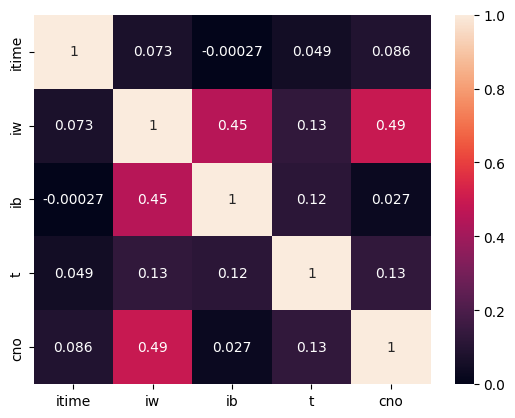

In [11]:
corr_matrix = cno.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
# 读取test数据
test_data = pd.read_csv('数据/测试/Ks20_22_01.csv')

test_data

,dataset,user_id,device_id,device_type,itime,iw,ib,t,cno,bg,base_ref
0,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/1/20 9:38,31.5,11.3,31.0,0,0,0
1,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/1/20 9:41,32.7,10.2,31.5,0,0,0
2,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/1/20 9:44,34.3,9.3,32.0,0,0,0
3,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/1/20 9:47,35.7,8.6,33.0,0,0,0
4,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/1/20 9:50,37.1,8.1,33.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6715,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/2/3 9:23,8.8,3.1,34.0,0,0,115
6716,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/2/3 9:26,8.7,3.0,34.0,0,0,116
6717,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/2/3 9:29,8.3,3.0,34.0,0,0,111
6718,2019_CT2,Ks20_22,Ks20_22_01,CT2,2020/2/3 9:32,8.6,3.0,34.0,0,0,109


In [22]:
# 转换item列
test_data['itime'] = pd.to_datetime(test_data['itime'])
# test_data['itime'] = test_data['itime'].dt.time

test_data['itime'] = test_data['itime'].dt.hour * 60 + test_data['itime'].dt.minute

test_data

,dataset,user_id,device_id,device_type,itime,iw,ib,t,cno,bg,base_ref
0,2019_CT2,Ks20_22,Ks20_22_01,CT2,578,31.5,11.3,31.0,0,0,0
1,2019_CT2,Ks20_22,Ks20_22_01,CT2,581,32.7,10.2,31.5,0,0,0
2,2019_CT2,Ks20_22,Ks20_22_01,CT2,584,34.3,9.3,32.0,0,0,0
3,2019_CT2,Ks20_22,Ks20_22_01,CT2,587,35.7,8.6,33.0,0,0,0
4,2019_CT2,Ks20_22,Ks20_22_01,CT2,590,37.1,8.1,33.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6715,2019_CT2,Ks20_22,Ks20_22_01,CT2,563,8.8,3.1,34.0,0,0,115
6716,2019_CT2,Ks20_22,Ks20_22_01,CT2,566,8.7,3.0,34.0,0,0,116
6717,2019_CT2,Ks20_22,Ks20_22_01,CT2,569,8.3,3.0,34.0,0,0,111
6718,2019_CT2,Ks20_22,Ks20_22_01,CT2,572,8.6,3.0,34.0,0,0,109


In [23]:
# 分离输入变量
test_data = test_data[['itime', 'iw', 'ib', 't']]

test_data

,itime,iw,ib,t
0,578,31.5,11.3,31.0
1,581,32.7,10.2,31.5
2,584,34.3,9.3,32.0
3,587,35.7,8.6,33.0
4,590,37.1,8.1,33.5
...,...,...,...,...
6715,563,8.8,3.1,34.0
6716,566,8.7,3.0,34.0
6717,569,8.3,3.0,34.0
6718,572,8.6,3.0,34.0


In [7]:
final =pd.read_csv('./outcome/final.csv')

label = ['itime', 'iw', 'ib', 't', 'cno', 'RNN', 'XGB', 'Random Forest']

final = final[label]

final = final[final['cno'] != 0]

final

,itime,iw,ib,t,cno,RNN,XGB,Random Forest
7,2020/1/20 9:59,40.2,7.2,34.0,189,119.087140,146.041150,138.34
27,2020/1/20 10:59,42.3,4.8,35.0,142,184.001700,163.503450,149.16
47,2020/1/20 11:59,36.5,4.0,34.5,120,134.721760,153.467540,143.51
59,2020/1/20 12:35,34.5,3.6,34.0,137,146.023200,137.096000,141.22
67,2020/1/20 12:59,36.1,3.7,34.5,159,134.911350,159.237230,153.28
...,...,...,...,...,...,...,...,...
6585,2020/2/3 2:53,8.4,2.8,35.5,117,111.873350,136.153020,101.07
6667,2020/2/3 6:59,8.1,2.7,32.0,128,103.368320,123.274280,107.08
6677,2020/2/3 7:29,8.0,2.5,33.5,126,111.926445,119.162575,105.66
6687,2020/2/3 7:59,8.5,3.0,33.0,123,107.947040,129.660800,108.88


In [24]:
# 保存文件

# test_data.to_csv('./数据/test.csv', index=False)